In [11]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import seaborn as sns 
import numpy as np 
import pandas as pd 
 
from sklearn.model_selection import train_test_split 
 
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.layers import Dense, Input 
from tensorflow.keras.utils import to_categorical 
%matplotlib inline 
sns.set(style = 'white', context = 'notebook', palette = 'deep') 
np.random.seed(42) 

In [13]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EX:10/fashion-mnist_train.csv") 
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EX:10/fashion-mnist_test.csv") 

In [14]:
y_train = train["label"] 
x_train = train.drop(labels = ["label"], axis = 1) 
 
print(type(x_train)) 
print(type(y_train)) 

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [15]:
x_train = x_train.to_numpy() 
y_train = y_train.to_numpy() 
 
print(type(x_train)) 
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [16]:
x_train = x_train.astype('float')/255. 


In [17]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42) 


In [18]:
x_train_size = len(x_train) 
x_val_size = len(x_val) 
 
print(x_train_size) 
print(x_val_size)

48000
12000


In [19]:

x_train_noisy = x_train + np.random.rand(x_train_size, 784) * 0.9 
x_val_noisy = x_val + np.random.rand(x_val_size, 784) * 0.9 
 

 
x_train_noisy = np.clip(x_train_noisy, 0., 1.) 
x_val_noisy = np.clip(x_val_noisy, 0., 1.)

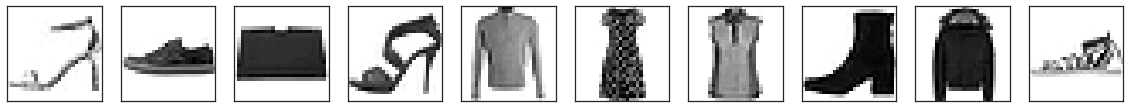

In [20]:
import matplotlib.pyplot as plt
def plot(x, p , labels = False):
  plt.figure(figsize = (20,2))
  for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x[i].reshape(28,28), cmap = 'binary') 
    plt.xticks([]) 
    plt.yticks([]) 
    if labels:
      plt.xlabel(np.argmax(p[i]))
      plt.show()
      return 
plot(x_train, None)

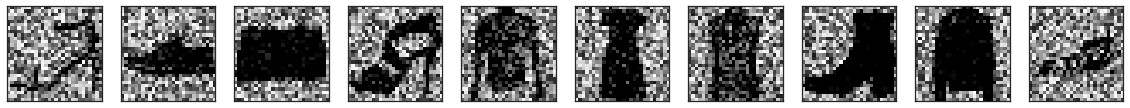

In [21]:
plot(x_train_noisy,None) 

In [22]:
input_image = Input(shape = (784, ) ) 
 
encoded = Dense(512, activation = 'relu')(input_image) 
encoded = Dense(512, activation = 'relu')(encoded) 
encoded = Dense(256, activation = 'relu')(encoded) 
encoded = Dense(256, activation = 'relu')(encoded) 
encoded = Dense(64, activation = 'relu')(encoded) 
 
decoded = Dense(512, activation = 'relu')(encoded) 
decoded = Dense(784, activation = 'sigmoid')(decoded) 
 
autoencoder = Model(input_image, decoded) 
a = autoencoder.compile(loss= 'binary_crossentropy' , optimizer = 'adam') 
autoencoder.summary() 
import tensorflow as tf 
history = autoencoder.fit(x_train_noisy, x_train, epochs=100, batch_size=128, 
 shuffle = True, validation_data=(x_val_noisy, x_val))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                                 
 dense_5 (Dense)             (None, 512)               33280 

In [23]:

preds = autoencoder.predict(x_val_noisy)


Test Image


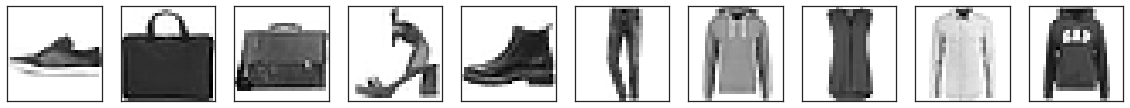

In [24]:
print("Test Image") 
plot(x_val, None)

Noisy Image


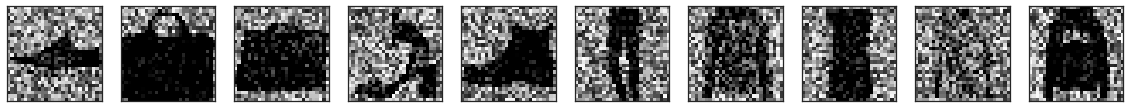

In [25]:
print("Noisy Image") 
plot(x_val_noisy, None) 

Denoised Image


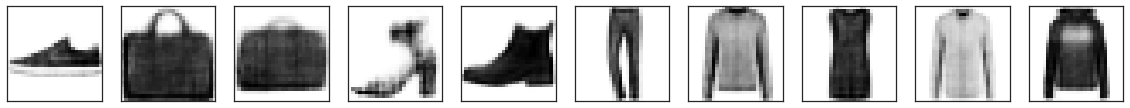

In [26]:
print("Denoised Image") 
plot(preds, None) 
 

In [27]:
def plot_loss(history, x = 'loss', y = 'val_loss'): 
 fig, ax = plt.subplots( figsize=(20,10)) 
 ax.plot(history.history[x]) 
 ax.plot(history.history[y]) 
 plt.title('Model Loss') 
 plt.ylabel(y) 
 plt.xlabel(x) 
 plt.legend(['Train', 'Val'], loc='upper left') 
 ax.grid(color='black') 
 plt.show() 

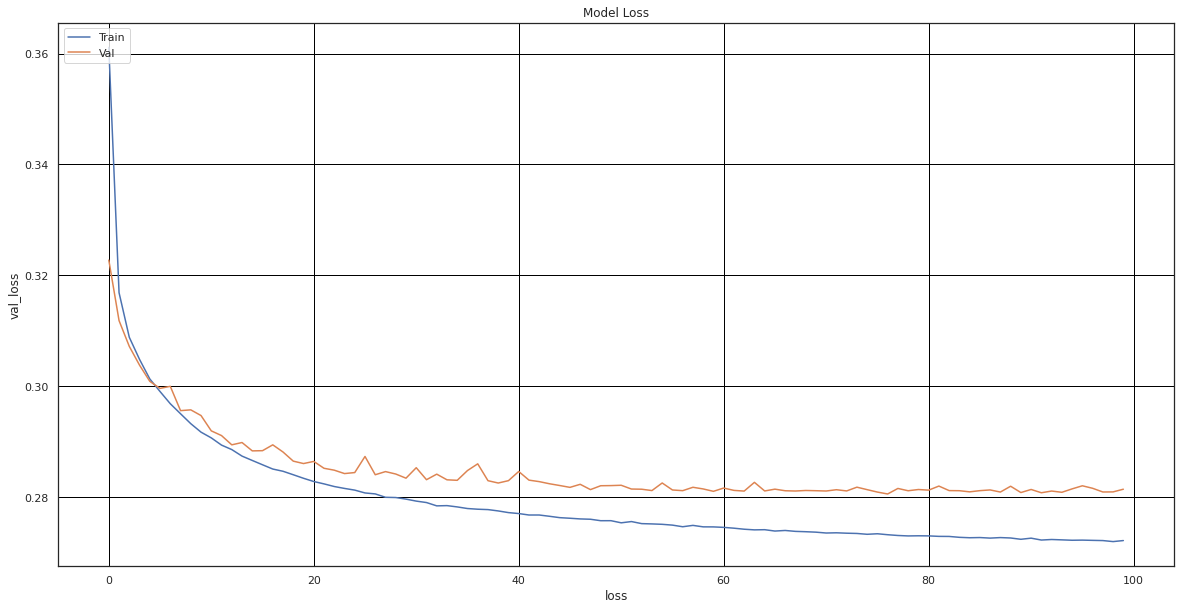

In [28]:
plot_loss(history)

In [29]:
from math import log10, sqrt
import cv2
import numpy as np
  
def PSNR(original, compressed):
    mse = np.mean((x_val - preds) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr
  
def main():
     original = x_val
     compressed = preds
     value = PSNR(x_val,preds)
     print(f"PSNR value is {value} dB")
       
if __name__ == "__main__":
    main()

PSNR value is 67.02357861138806 dB
